
# Interactive Contour Plot of $J(m,b)$ with Adjustable Point

This notebook visualizes the mean squared error (MSE)
$J(m,b) = \frac{1}{n}\sum_{i=1}^n \big(y_i - (m x_i + b)\big)^2 $
for the dataset $(1,2),(2,1),(3,3),(4,2),(5,4)$.

Use the sliders (and optional click interaction) to move a point $(m,b)$ on the contour plot. The right panel shows the corresponding line $y = m x + b$ against the data. The current value of $J(m,b)$ is displayed in the title.

You can also see a GeoGebra applet here: https://www.geogebra.org/calculator/bug7f5fx

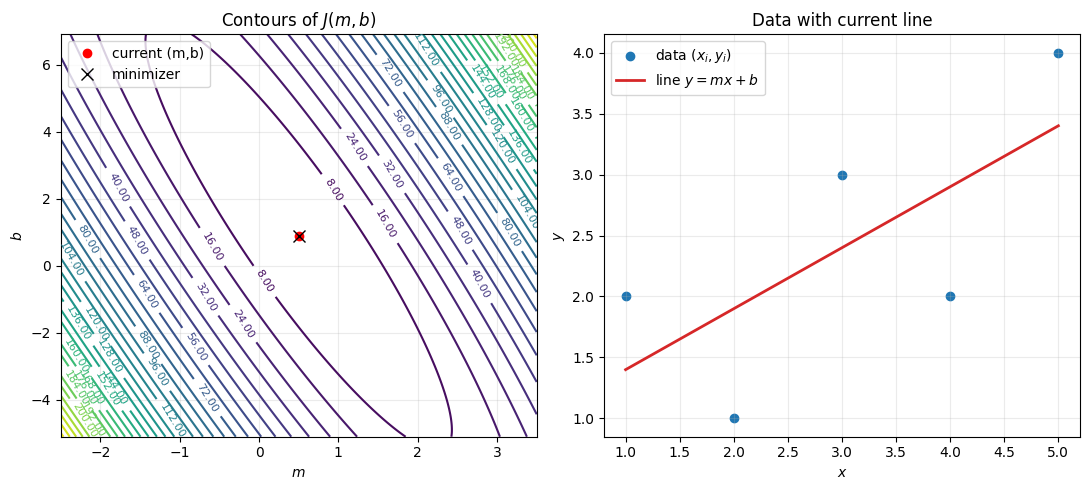

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from ipywidgets import FloatSlider, HBox, VBox, interactive_output, HTML
from IPython.display import display

# --- Data ---
x = np.array([1,2,3,4,5], dtype=float)
y = np.array([2,1,3,2,4], dtype=float)
X = np.column_stack([x, np.ones_like(x)])
n = len(x)

# --- Cost function J(m,b) ---
def J_of(m, b):
    r = y - (m*x + b)
    return (r @ r) / n

# Least-squares solution (reference optimum)
beta_star = np.linalg.solve(X.T @ X, X.T @ y)
m_star, b_star = beta_star
J_star = J_of(m_star, b_star)

# --- Precompute a grid for contours ---
# Choose a window around the optimum so students see the bowl near the min
m_span = 3.0
b_span = 6.0
m_vals = np.linspace(m_star - m_span, m_star + m_span, 300)
b_vals = np.linspace(b_star - b_span, b_star + b_span, 300)
M, B = np.meshgrid(m_vals, b_vals)
J_vals = np.empty_like(M)
for i, bv in enumerate(b_vals):
    residuals = y[:,None] - (x[:,None] * m_vals[None,:] + bv)
    J_vals[i,:] = (residuals**2).mean(axis=0)

# --- Build figure (two subplots) ---
fig, (axC, axD) = plt.subplots(1, 2, figsize=(11, 5))

# Contour panel
CS = axC.contour(M, B, J_vals, levels=30, cmap='viridis')
axC.clabel(CS, inline=True, fontsize=8, fmt='%.2f')
pt, = axC.plot([m_star], [b_star], 'ro', label='current (m,b)')
axC.plot([m_star], [b_star], 'kx', ms=8, label='minimizer')
axC.set_xlabel('$m$')
axC.set_ylabel('$b$')
axC.set_title('Contours of $J(m,b)$')
axC.legend(loc='best')
axC.grid(True, alpha=0.25)

# Data + line panel
axD.scatter(x, y, c='tab:blue', label='data $(x_i,y_i)$')
line_plot, = axD.plot(x, m_star*x + b_star, color='tab:red', lw=2, label='line $y=mx+b$')
axD.set_xlabel('$x$')
axD.set_ylabel('$y$')
axD.set_title('Data with current line')
axD.legend(loc='best')
axD.grid(True, alpha=0.25)

fig.tight_layout()

# --- Widgets ---
slider_m = FloatSlider(value=float(m_star), min=float(m_star-2), max=float(m_star+2), step=0.01, description='m', readout_format='.2f', continuous_update=True)
slider_b = FloatSlider(value=float(b_star), min=float(b_star-4), max=float(b_star+4), step=0.01, description='b', readout_format='.2f', continuous_update=True)
readout = HTML()

# Update function for widgets
def update(m, b):
    # Update point on contour
    pt.set_data([m], [b])
    # Update line on data plot
    line_plot.set_ydata(m*x + b)
    # Update titles with current J
    val = J_of(m, b)
    axC.set_title(f'Contours of $J(m,b)$   (current: J={val:.4f})')
    axD.set_title(f'Data with current line   ($m={m:.2f}$, $b={b:.2f}$)')
    readout.value = f"<b>Current:</b> m={m:.3f}, b={b:.3f}, J(m,b)={val:.6f} &nbsp;&nbsp; | &nbsp;&nbsp; <b>Min:</b> m*={m_star:.3f}, b*={b_star:.3f}, J*={J_star:.6f}"
    fig.canvas.draw_idle()

out = interactive_output(update, {'m': slider_m, 'b': slider_b})

controls = HBox([slider_m, slider_b])
display(VBox([controls, out, readout]))

plt.show()



### Optional: Click-to-move interaction
If your backend supports interactive Matplotlib events, you can also **click** in the contour panel to set \((m,b)\) directly. The sliders update accordingly.


In [ ]:

# OPTIONAL: Click to set (m,b) on the contour plot
try:
    # Reuse existing slider_m, slider_b, axC from the previous cell
    def on_click(event):
        if event.inaxes is axC and event.xdata is not None and event.ydata is not None:
            slider_m.value = float(event.xdata)
            slider_b.value = float(event.ydata)
    cid = fig.canvas.mpl_connect('button_press_event', on_click)
    print('Click interaction enabled: click on the contour plot to set (m,b).')
except Exception as e:
    print('Click interaction not available in this environment:', e)



#### Notes
- This notebook uses **MSE** (mean of squared residuals). If you prefer **SSE**, multiply all contour values by \(n=5\); the shape and minimizer are the same.
- The analytic minimizer for this dataset is \(m^*=0.5\), \(b^*=0.9\), with \(J(m^*,b^*)=0.54\).
- If the sliders don't appear in JupyterLab, ensure `ipywidgets` is installed and enabled:
  ```bash
  pip install ipywidgets
  ```
  For classic Notebook: `jupyter nbextension enable --py widgetsnbextension`
  For JupyterLab 3+: widgets usually work out-of-the-box once installed.
